<a href="https://colab.research.google.com/github/PRIMEADAWAS/CEB_Assignment/blob/main/RADI608%2C602_A5_PasitSupholkhan_(Assignment_Semi_supervised_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADI608,602_A5_PasitSupholkhan 6536115 (Assignment : Semi-supervised learning)

**Assignment : Semi-supervised learning**

RADI 608, 602: Data Mining and Machine Learning 2022

# a) (6 points) 


## 1) From colon.csv, please reduce data dimension by using 2 features (column’s name or gene#: T62947 and H64807).


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Pandas version :',pd.__version__)
print('Numpy version :',np.__version__)
print('Matplotlib version :',mpl.__version__)

Pandas version : 1.3.5
Numpy version : 1.21.6
Matplotlib version : 3.2.2


In [7]:
# import colonData
url ='https://raw.githubusercontent.com/ViktorHexCore/R_CEB/main/DataForRpartOne/colon.csv'
# url =r'/content/drive/MyDrive/Dataset/Assignment/colon.csv'
df_colon = pd.read_csv(url)
df_colon.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62,1


In [8]:
df_colon.shape

(62, 2001)

In [9]:
# get only two column 'T62947','H64807'
X = df_colon[['T62947','H64807']]
y = df_colon['Class']
X.head()

,T62947,H64807
0,-1.360,-1.470
1,-1.130,-0.830
2,-0.377,-0.147
3,-1.240,-0.173
4,-0.745,-0.420


In [10]:
y

0     1
1     1
2     1
3     1
4     1
     ..
57   -1
58   -1
59   -1
60   -1
61   -1
Name: Class, Length: 62, dtype: int64

Text(0.5, 1.0, 'Colon Data')

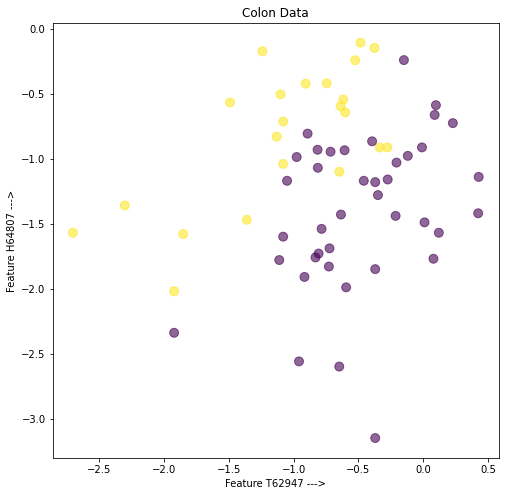

In [11]:
# plot group by colors
plt.figure(figsize=(8,8))
plt.scatter(X['T62947'],X['H64807'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature T62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon Data')

## 2) Generate labeled and unlabeled data by random selecting 42 samples without replacement and removing their class to perform as unlabeled data. The non-selected 20samples will be used as labeled data (42:20).


In [12]:
#Spliting data 20 as labeled data / 42 as unlabeled data
from sklearn.model_selection import train_test_split
seed = 6536115
X_unlabel, X_label, y_unlabel, y_label = train_test_split(X,y,test_size = 20, random_state=seed)
print(X_unlabel.shape,
X_label.shape,
y_unlabel.shape,
y_label.shape)

(42, 2) (20, 2) (42,) (20,)


In [13]:
X_label.index

Int64Index([55, 18, 35, 61, 39, 4, 2, 51, 43, 40, 42, 31, 7, 23, 36, 57, 10,
            24, 11, 46],
           dtype='int64')

In [14]:
X_unlabel.index

Int64Index([45, 58,  5, 25, 29,  6, 48, 59, 27, 44, 22, 19, 38, 50, 15, 34, 49,
            60, 14,  0, 12, 20,  8, 32,  1, 53, 41, 26, 30, 16,  9, 54, 56, 17,
            37, 47, 13,  3, 52, 28, 33, 21],
           dtype='int64')

In [15]:
new_y = y.copy()
new_y[X_unlabel.index]=0

In [16]:
new_y

0     0
1     0
2     1
3     0
4     1
     ..
57   -1
58    0
59    0
60    0
61   -1
Name: Class, Length: 62, dtype: int64

## 3) Perform SVM by using 20labelled samples.


In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_label,y_label)
# predict = model.predict(X_label)

SVC()

**SVC model use label 20 data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Colon Data')

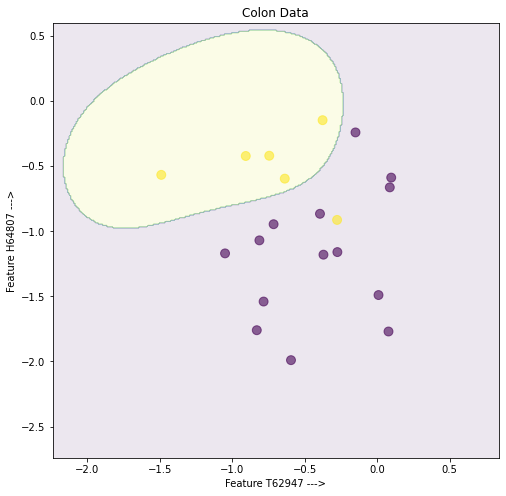

In [18]:
# plot group by colors
arr1 = np.arange(X_label.iloc[:, 0].min()-0.75, X_label.iloc[:, 0].max()+0.75, 0.01)
arr2 = np.arange(X_label.iloc[:, 1].min()-0.75, X_label.iloc[:, 1].max()+0.75, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_label['T62947'],X_label['H64807'],c=y_label,s=80,alpha=0.6)
plt.xlabel('Feature T62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon Data')

**SVC model use normal 62 label data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Colon Data')

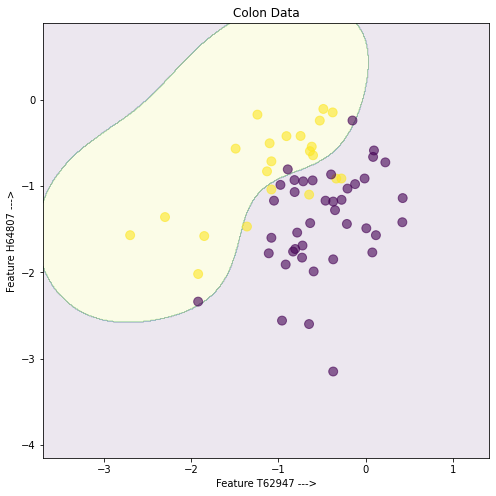

In [19]:
# plot group by colors
arr1 = np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
modelSVCAll = SVC()
modelSVCAll.fit(X,y)
labels = modelSVCAll.predict(input_array)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['T62947'],X['H64807'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature T62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon Data')

## 4) Perform Label Propagation at label spreading 30%, 50%, and 70% by using Python and data from 1). (random replace the original 62 samples)

In [20]:
# import colonData
url ='https://raw.githubusercontent.com/ViktorHexCore/R_CEB/main/DataForRpartOne/colon.csv'
# url =r'/content/drive/MyDrive/Dataset/Assignment/colon.csv'
df_colon = pd.read_csv(url)
df_colon.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62,1


In [21]:
# get only two column 'T62947','H64807'
X = df_colon[['T62947','H64807']]
y = df_colon['Class']
X.head()

,T62947,H64807
0,-1.360,-1.470
1,-1.130,-0.830
2,-0.377,-0.147
3,-1.240,-0.173
4,-0.745,-0.420


In [22]:
y

0     1
1     1
2     1
3     1
4     1
     ..
57   -1
58   -1
59   -1
60   -1
61   -1
Name: Class, Length: 62, dtype: int64

In [23]:
# create random unlabel y data 30%, 50%, 70%
from sklearn.semi_supervised import LabelSpreading
rng = np.random.RandomState(6536115)
h = .02
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = 0
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = 0
y_70 = np.copy(y)
y_70[rng.rand(len(y)) < 0.7] = 0
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30)
ls50 = (LabelSpreading().fit(X, y_50), y_50)
ls70 = (LabelSpreading().fit(X, y_70), y_70)
# ls100 = (LabelSpreading().fit(X, y), y)
model = SVC()
model.fit(X_label,y_label)
# rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)
# rbf_svc = (model.fit(X_label,y_label), np.array(y_label))

SVC()

In [24]:
y_30

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,
        1,  0,  0,  1,  1,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,
        0,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1])

In [25]:
y_50

array([ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1,  0,
        1,  1,  0,  1,  0, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  0,  0, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1])

In [26]:
y_70

array([ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0, -1, -1,  0,  0, -1,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0])

## 5) Compare and discuss the model performance from 3) and 4) by plotting two-dimension graph with decision boundary.


In [27]:
# create a mesh to plot in. Return coordinate matrices from coordinate vectors
x_min, x_max = X.iloc[:, 0].min() -1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() -1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
# title for the plots
titles = ['Label Spreading 30% data',
'Label Spreading 50% data',
'Label Spreading 70% data']
color_map = {-1: (0, 0, 0.9), 0: (1, 1, 1), 1: (1, 0, 0)}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"


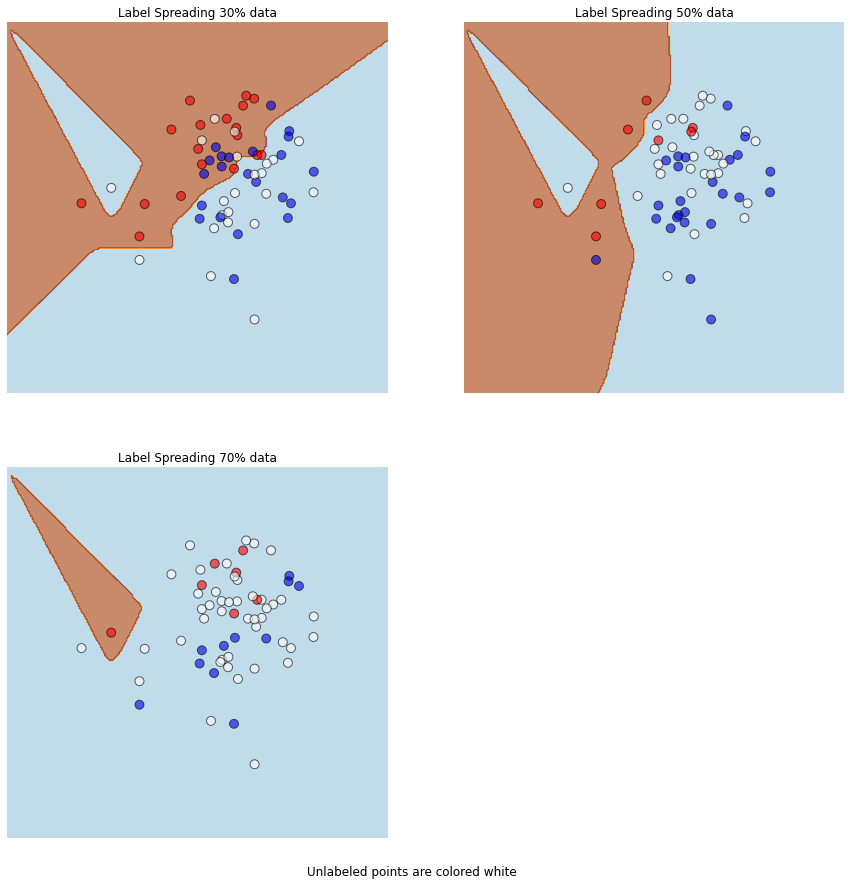

In [28]:
plt.figure(figsize=(15,15))
for i, (clf, y_train) in enumerate((ls30, ls50, ls70)):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha = 0.7, cmap=plt.cm.Paired)
  plt.axis('off')
  # Plot also the training points
  colors = [color_map[y] for y in y_train]
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, edgecolors='black',s=80,alpha=0.6)
  plt.title(titles[i])
plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()


**SVC model use label 20 data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Colon 20 label Data')

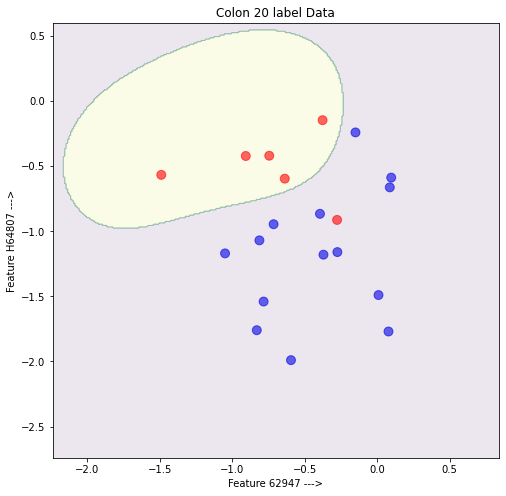

In [29]:
# To Plot the Decision Boundary.
arr1 = np.arange(X_label.iloc[:, 0].min()-0.75, X_label.iloc[:, 0].max()+0.75, 0.01)
arr2 = np.arange(X_label.iloc[:, 1].min()-0.75, X_label.iloc[:, 1].max()+0.75, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)

colors = [color_map[y] for y in y_label]

plt.scatter(X_label['T62947'],X_label['H64807'],c=colors,s=80,alpha=0.6)
plt.xlabel('Feature 62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon 20 label Data')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Colon Data + SVM 20 label data')

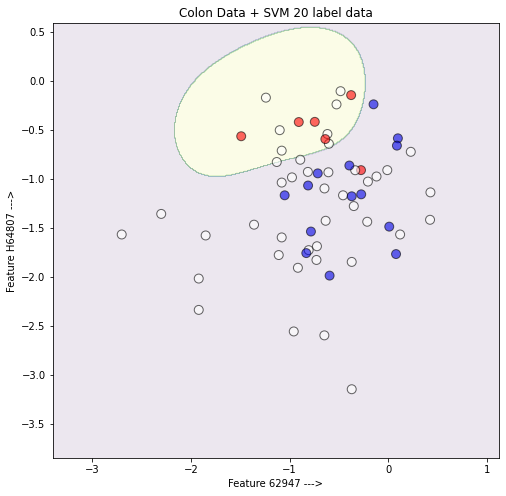

In [30]:
# To Plot the Decision Boundary. white is non label data
arr1 = np.arange(X.iloc[:, 0].min()-0.7, X.iloc[:, 0].max()+0.7, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-0.7, X.iloc[:, 1].max()+0.7, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

colors = [color_map[y] for y in new_y]

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['T62947'],X['H64807'],c=colors, edgecolors='black',s=80,alpha=0.6)
plt.xlabel('Feature 62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon Data + SVM 20 label data')

**SVC model use normal 62 label data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Colon Data')

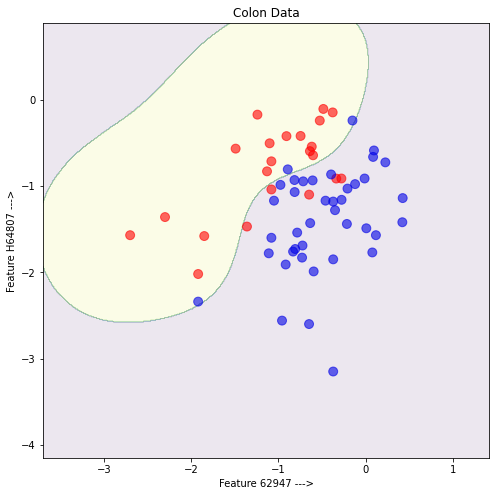

In [31]:
# plot group by colors
arr1 = np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
modelSVCAll = SVC()
modelSVCAll.fit(X,y)
labels = modelSVCAll.predict(input_array)

colors = [color_map[y] for y in y]

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['T62947'],X['H64807'],c=colors,s=80,alpha=0.6)
plt.xlabel('Feature 62947 --->')
plt.ylabel('Feature H64807 --->')
plt.title('Colon Data')

### $\color{green} {Discussion}$

label propagation unlabel y 30% was perform good for classification from dicision boundary and performance decline in 50% then worst for 70%

svm 20 label data compare with normal data

# b) (6 points) 


## 1) Please select one dataset from a UCI (https://archive.ics.uci.edu/ml/index.php) and reduce data dimension by using only 2 features (select your own two features by random choosing or using any feature selection methods).

https://archive-beta.ics.uci.edu/dataset/46/hepatitis

In [83]:
# import hepatitisData
url = 'https://raw.githubusercontent.com/PRIMEADAWAS/CEB_Assignment/main/RADI%20608%2C%20602%20Data%20Mining%20and%20Machine%20Learning/Assignment%20Semi-supervise%20learning/hepatitis.csv'
df_hepatitis = pd.read_csv(url)
df_hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [84]:
df_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER_BIG        155 non-null    object
 9   LIVER_FIRM       155 non-null    object
 10  SPLEEN_PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK_PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [85]:
print(df_hepatitis['BILIRUBIN'].unique())
df_hepatitis[df_hepatitis['BILIRUBIN']=='?']

['1.00' '0.90' '0.70' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
14,2,47,1,1,1,2,2,2,2,2,2,2,2,2,?,?,60,?,?,1
44,2,34,1,2,2,2,2,2,2,2,2,2,2,2,?,?,86,?,?,1
56,2,34,1,1,2,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1
99,2,60,1,1,2,1,2,2,1,1,1,1,2,2,?,?,40,?,?,2
118,1,61,1,1,2,1,1,2,?,?,2,1,2,2,?,?,?,?,?,2


In [86]:
print(df_hepatitis['SGOT'].unique())
df_hepatitis[df_hepatitis['SGOT']=='?']

['18' '42' '32' '52' '200' '28' '?' '48' '120' '30' '249' '60' '144' '89'
 '53' '166' '20' '98' '63' '46' '55' '25' '58' '29' '92' '150' '68' '14'
 '16' '90' '86' '110' '80' '420' '44' '65' '145' '31' '78' '59' '38' '75'
 '64' '54' '43' '33' '15' '39' '182' '271' '45' '100' '242' '24' '224'
 '69' '156' '123' '117' '157' '128' '23' '40' '227' '269' '34' '648' '225'
 '136' '81' '153' '118' '231' '101' '278' '49' '181' '140' '70' '114'
 '173' '528' '152' '142' '19']


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
56,2,34,1,1,2,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1
118,1,61,1,1,2,1,1,2,?,?,2,1,2,2,?,?,?,?,?,2


In [87]:
# remove 7 rows data contain '?' 
df_hepatitis = df_hepatitis[(df_hepatitis['BILIRUBIN']!='?') & (df_hepatitis['SGOT']!='?')]
df_hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            148 non-null    int64 
 1   AGE              148 non-null    int64 
 2   SEX              148 non-null    int64 
 3   STEROID          148 non-null    object
 4   ANTIVIRALS       148 non-null    int64 
 5   FATIGUE          148 non-null    object
 6   MALAISE          148 non-null    object
 7   ANOREXIA         148 non-null    object
 8   LIVER_BIG        148 non-null    object
 9   LIVER_FIRM       148 non-null    object
 10  SPLEEN_PALPABLE  148 non-null    object
 11  SPIDERS          148 non-null    object
 12  ASCITES          148 non-null    object
 13  VARICES          148 non-null    object
 14  BILIRUBIN        148 non-null    object
 15  ALK_PHOSPHATE    148 non-null    object
 16  SGOT             148 non-null    object
 17  ALBUMIN          148 non-null    ob

In [88]:
# get only two column 'BILIRUBIN','SGOT'
X = df_hepatitis[['BILIRUBIN','SGOT']].apply(pd.to_numeric)
y = df_hepatitis['Class']
X.head()

,BILIRUBIN,SGOT
0,1.0,18
1,0.9,42
2,0.7,32
3,0.7,52
4,1.0,200


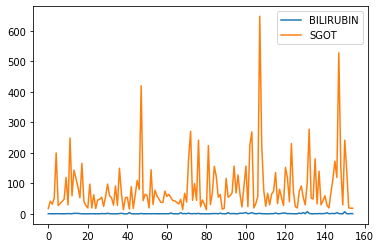

In [89]:
X.plot()

Normalize X dataframe

In [90]:
from sklearn.preprocessing import MinMaxScaler
data = X.values
scaler = MinMaxScaler()
x = scaler.fit_transform(data)
x[:10]

array([[0.09090909, 0.00630915],
       [0.07792208, 0.04416404],
       [0.05194805, 0.02839117],
       [0.05194805, 0.05993691],
       [0.09090909, 0.29337539],
       [0.07792208, 0.02208202],
       [0.05194805, 0.05362776],
       [0.09090909, 0.16719243],
       [0.12987013, 0.02523659],
       [0.09090909, 0.37066246]])

In [91]:
X['BILIRUBIN'] = x[:,0]
X['SGOT'] = x[:,1]
X.head()

,BILIRUBIN,SGOT
0,0.090909,0.006309
1,0.077922,0.044164
2,0.051948,0.028391
3,0.051948,0.059937
4,0.090909,0.293375


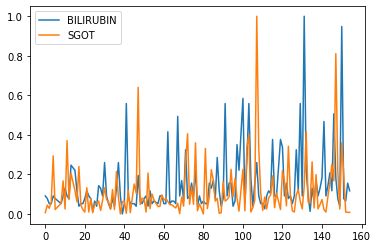

In [92]:
X.plot()

In [93]:
y

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 148, dtype: int64

In [94]:
from collections import Counter
Counter(y)

Counter({2: 118, 1: 30})

Use SMOTE for imbalance data

In [95]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({2: 118, 1: 118})


Text(0.5, 1.0, 'Hepatitis Data')

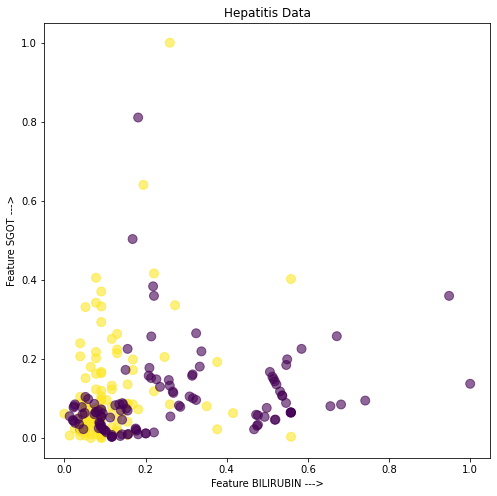

In [96]:
# plot group by colors
plt.figure(figsize=(8,8))
plt.scatter(X['BILIRUBIN'],X['SGOT'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis Data')

## 2) Generate labeled and unlabeled data by random selecting 68% of samples without replacement and removing their class to perform as unlabeled data. The non-selected 32% of samples will be used as labeled data


In [97]:
#Spliting data 32% as labeled data / 68% as unlabeled data
from sklearn.model_selection import train_test_split
seed = 6536115
X_unlabel, X_label, y_unlabel, y_label = train_test_split(X,y,test_size = 0.32, random_state=seed,stratify = y)
print(X_unlabel.shape,
X_label.shape,
y_unlabel.shape,
y_label.shape)

(160, 2) (76, 2) (160,) (76,)


In [98]:
X_label.index

Int64Index([ 98,  96, 226, 141, 115, 203, 132, 113,  43, 131,  99,  48,  33,
              3, 195,  41,  28, 150, 171,  80,  20, 177, 124, 102, 152, 122,
            107, 198,  12,  27,   8,  59, 196,  21, 106, 167, 183,  56, 145,
            225,  42, 190, 212, 188,  47, 155,  40, 234,  44,  54,  69, 194,
            151,  22,  52,  79, 185, 133,  25, 119,  86, 191, 105, 126, 100,
            230,   5,  39, 229, 197, 208, 159,  13, 210, 228,  92],
           dtype='int64')

In [99]:
X_unlabel.index

Int64Index([ 49, 174, 216,   6,  89, 184, 148, 202, 164, 158,
            ...
             82, 138,  37,  62,  45, 204, 154,  76,  53,  34],
           dtype='int64', length=160)

In [100]:
new_y = y.copy()
new_y[X_unlabel.index]=0
new_y

0      0
1      0
2      0
3      2
4      0
      ..
231    0
232    0
233    0
234    1
235    0
Name: Class, Length: 236, dtype: int64

## 3) Perform SVM by using all labelled data from 2). (32% samples)

In [101]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_label,y_label)
# predict = model.predict(X_label)

SVC()

**SVC model use label 20 data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Hepatitis Data')

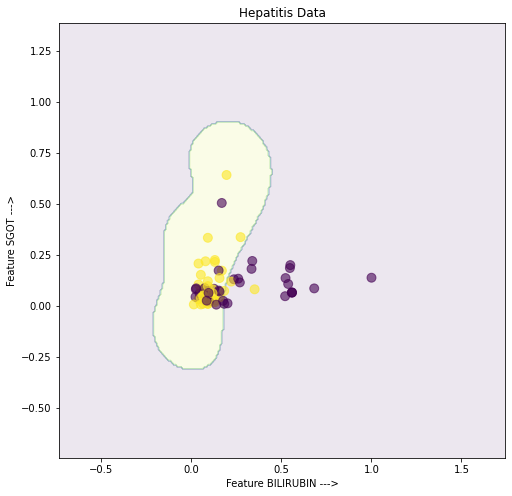

In [106]:
# plot group by colors
arr1 = np.arange(X_label.iloc[:, 0].min()-0.75, X_label.iloc[:, 0].max()+0.75, 0.01)
arr2 = np.arange(X_label.iloc[:, 1].min()-0.75, X_label.iloc[:, 1].max()+0.75, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_label['BILIRUBIN'],X_label['SGOT'],c=y_label,s=80,alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis Data')

**SVC model use normal all label data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Hepatitis Data')

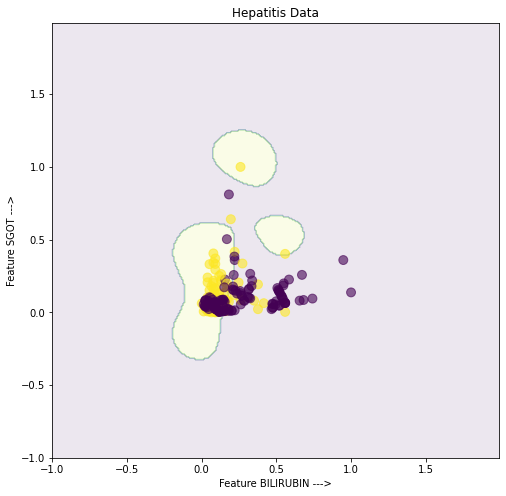

In [107]:
# plot group by colors
arr1 = np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
modelSVCAll = SVC()
modelSVCAll.fit(X,y)
labels = modelSVCAll.predict(input_array)

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['BILIRUBIN'],X['SGOT'],c=y,s=80,alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis Data')

## 4) Perform Label Propagation at label spreading 30%, 50%, and 70% by using Python and data from 1). (random replace the original 62 samples)

In [108]:
X.head()

,BILIRUBIN,SGOT
0,0.090909,0.006309
1,0.077922,0.044164
2,0.051948,0.028391
3,0.051948,0.059937
4,0.090909,0.293375


In [109]:
y

0      2
1      2
2      2
3      2
4      2
      ..
231    1
232    1
233    1
234    1
235    1
Name: Class, Length: 236, dtype: int64

In [116]:
# create random unlabel y data 30%, 50%, 70%
from sklearn.semi_supervised import LabelSpreading
rng = np.random.RandomState(6536115)
h = 0.01
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = 0
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = 0
y_70 = np.copy(y)
y_70[rng.rand(len(y)) < 0.7] = 0
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
ls30 = (LabelSpreading().fit(X, y_30), y_30)
ls50 = (LabelSpreading().fit(X, y_50), y_50)
ls70 = (LabelSpreading().fit(X, y_70), y_70)
# ls100 = (LabelSpreading().fit(X, y), y)
model = SVC()
model.fit(X_label,y_label)
# rbf_svc = (svm.SVC(kernel='rbf', gamma=.5).fit(X, y), y)
# rbf_svc = (model.fit(X_label,y_label), np.array(y_label))

SVC()

In [117]:
y_30

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2,
       0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [118]:
y_50

array([0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [119]:
y_70

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

## 5) Compare and discuss the model performance from 3) and 4) by plotting two-dimension graph with decision boundary.


In [120]:
# create a mesh to plot in. Return coordinate matrices from coordinate vectors
x_min, x_max = X.iloc[:, 0].min() -1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() -1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
# title for the plots
titles = ['Label Spreading 30% data',
'Label Spreading 50% data',
'Label Spreading 70% data']
color_map = {2: (0, 0, 0.9), 0: (1, 1, 1), 1: (1, 0, 0)}

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  "X does not have valid feature names, but"


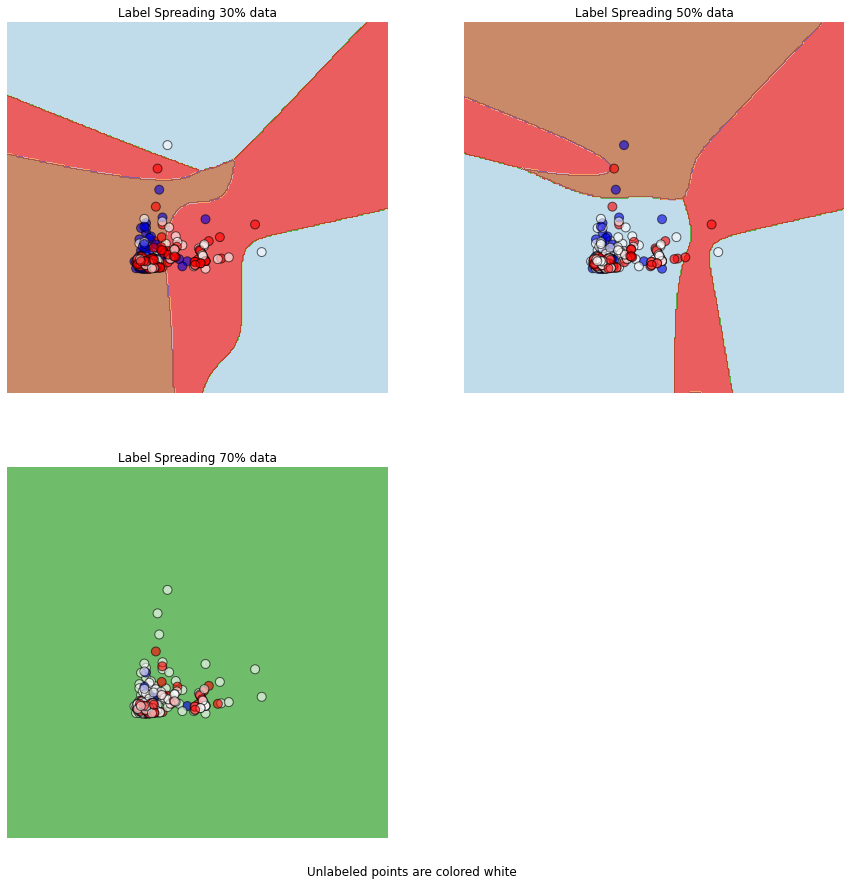

In [123]:
plt.figure(figsize=(15,15))
for i, (clf, y_train) in enumerate((ls30, ls50, ls70)):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha = 0.7, cmap=plt.cm.Paired)
  plt.axis('off')
  # Plot also the training points
  colors = [color_map[y] for y in y_train]
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, edgecolors='black',s=80,alpha=0.6)
  plt.title(titles[i])
plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()


**SVC model use label 20 data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Hepatitis 32% label Data')

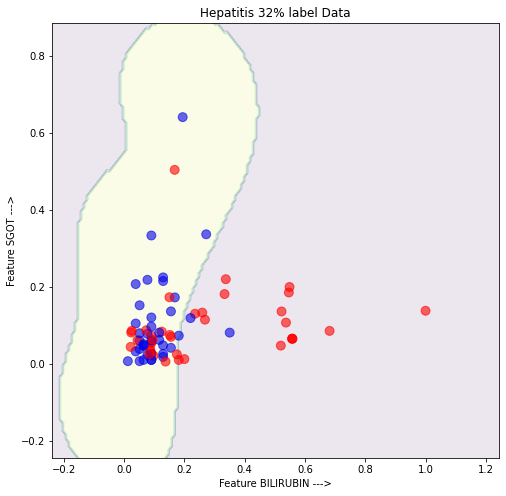

In [131]:
# plot group by colors
arr1 = np.arange(X_label.iloc[:, 0].min()-0.25, X_label.iloc[:, 0].max()+0.25, 0.01)
arr2 = np.arange(X_label.iloc[:, 1].min()-0.25, X_label.iloc[:, 1].max()+0.25, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

colors = [color_map[y] for y in y_label]

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X_label['BILIRUBIN'],X_label['SGOT'],c=colors,s=80,alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis 32% label Data')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Hepatitis Data + SVM 32% label data')

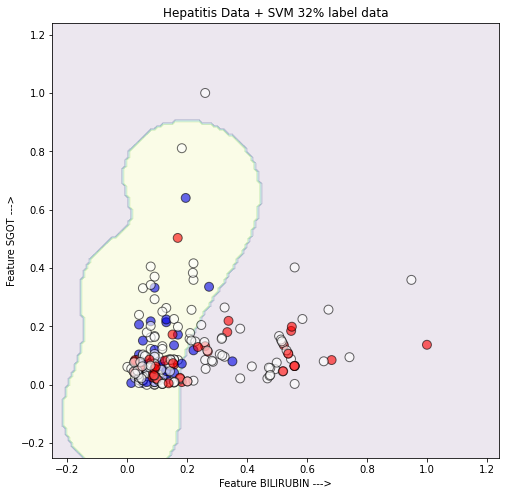

In [132]:
# To Plot the Decision Boundary. white is non label data
arr1 = np.arange(X.iloc[:, 0].min()-0.25, X.iloc[:, 0].max()+0.25, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-0.25, X.iloc[:, 1].max()+0.25, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
labels = model.predict(input_array)

colors = [color_map[y] for y in new_y]

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['BILIRUBIN'],X['SGOT'],c=colors,s=80, edgecolors='black',alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis Data + SVM 32% label data')

**SVC model use normal 62 label data**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Hepatitis Data ')

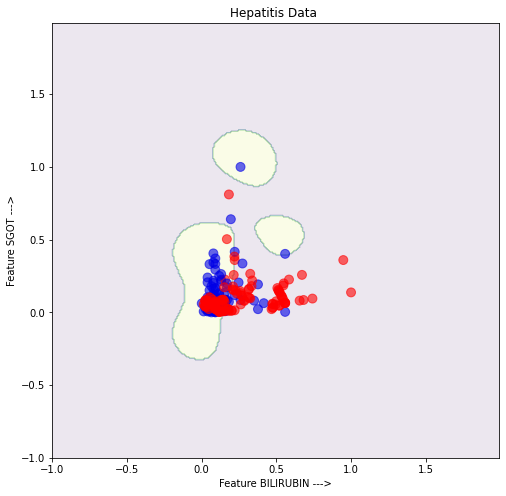

In [127]:
# plot group by colors
arr1 = np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.01)
arr2 = np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.01)

xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T
modelSVCAll = SVC()
modelSVCAll.fit(X,y)
labels = modelSVCAll.predict(input_array)

colors = [color_map[y] for y in y]

plt.figure(figsize=(8,8))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(X['BILIRUBIN'],X['SGOT'],c=colors,s=80,alpha=0.6)
plt.xlabel('Feature BILIRUBIN --->')
plt.ylabel('Feature SGOT --->')
plt.title('Hepatitis Data ')

### $\color{green} {Discussion}$

label propagation unlabel y 30% can perform classification from dicision boundary and performance decline in 50% then worst for 70%
on 70% non label cannot create dicision boundary  
svm 20 label data compare with normal data quite a bit difference

# c) (8 points) Dont run this part due to ROC value


## 1) From colon.csv, please reduce data dimension by using 2 features (column’s name or gene#: T62947 and H64807).


In [222]:
# import colonData
url ='https://raw.githubusercontent.com/ViktorHexCore/R_CEB/main/DataForRpartOne/colon.csv'
# url =r'/content/drive/MyDrive/Dataset/Assignment/colon.csv'
df_colon = pd.read_csv(url)
df_colon.head()

,H55933,R39465,R39465.1,R85482,U14973,R02593,T51496,H80240,T65938,T55131,...,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,3.62,3.31,2.986154,2.71,2.091310,3.12,2.745517,2.42,3.352726,2.97,...,-1.030,-0.983356,-0.531,-1.142698,-1.110,-0.520386,-0.315,-1.764190,-2.75,1
1,3.47,3.68,3.425553,3.05,2.402400,2.46,2.150405,2.26,3.020793,3.26,...,-1.230,-3.063926,0.156,-0.687025,-0.777,-1.093455,-1.210,-1.062064,-2.13,1
2,3.02,2.78,2.569772,3.21,2.707560,2.63,2.385288,3.00,2.633958,2.40,...,-0.758,0.318488,-1.250,-1.099859,-0.131,-2.748068,-1.010,-2.260031,-1.50,1
3,3.10,2.86,2.772942,3.19,2.354082,2.76,2.103475,2.93,3.176524,2.84,...,-1.180,0.079492,-1.070,-0.465491,-0.455,-1.804783,-1.610,-1.223450,-1.07,1
4,3.01,2.91,2.560548,3.25,2.336800,3.04,2.881109,2.55,2.852425,2.57,...,-0.491,-0.081214,-1.160,-0.889998,-0.528,-1.636024,-1.210,-1.232686,-1.62,1


In [224]:
# get only two column 'T62947','H64807'
X = df_colon[['T62947','H64807']]
y = df_colon['Class']
X.head()

,T62947,H64807
0,-1.360,-1.470
1,-1.130,-0.830
2,-0.377,-0.147
3,-1.240,-0.173
4,-0.745,-0.420


## 2) Use a SMOTE transformed version of the dataset + Decision Tree Classifier

In [104]:
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({-1: 40, 1: 22})


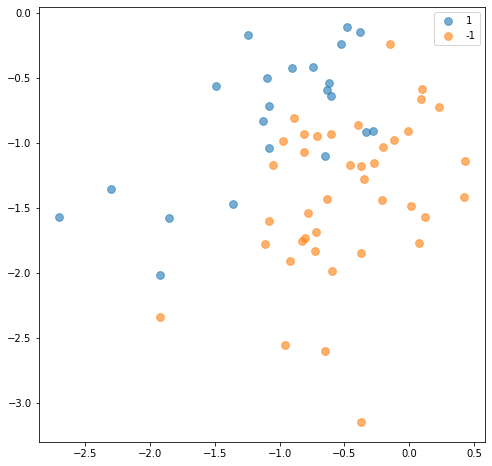

In [92]:
# scatter plot of examples by class label
from matplotlib import pyplot
from numpy import where

plt.figure(figsize=(8,8))
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label),s=60,alpha=0.6)
pyplot.legend()
pyplot.show()

**Use SMOTE to create additional data. now class = 1 was inceased to 40**

In [93]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
# summarize the new class distribution
counter_smote = Counter(y_smote)
print(counter_smote)

Counter({1: 40, -1: 40})


**Plot new data after preform SMOTE**

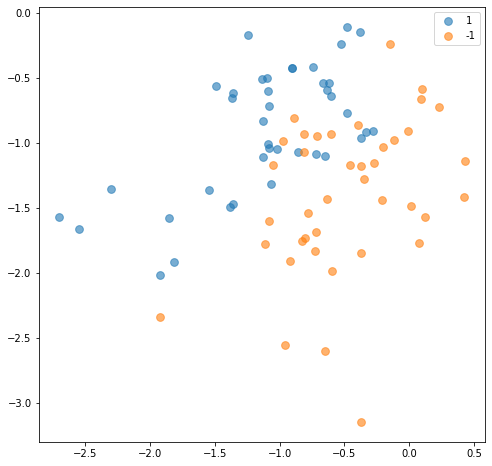

In [94]:
# scatter plot of examples by class label
from matplotlib import pyplot
from numpy import where
plt.figure(figsize=(8,8))

for label, _ in counter.items():
  row_ix = where(y_smote == label)[0]
  pyplot.scatter(X_smote.iloc[row_ix, 0], X_smote.iloc[row_ix, 1], label=str(label),s=60,alpha=0.6)
pyplot.legend()
pyplot.show()

In [99]:
# decision tree evaluated on imbalanced dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

**get AUC by cross validation model DecisionTreeClassifier without SMOTE**

In [185]:
# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, np.array(X), y, scoring='roc_auc', cv=cv, n_jobs=-1)
# print Mean Score of ROC AUC
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.767


**Use a SMOTE transformed version of the dataset.**


In [216]:
# define pipeline
from imblearn.pipeline import Pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, np.array(X), y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.801


## 3) Use a SMOTE transformed version of the dataset combined with undersampling of the majority class + Decision Tree Classifier

In [203]:
from imblearn.under_sampling import RandomUnderSampler
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.9)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, np.array(X), y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.826


## 4) Use a SMOTE transformed version of the dataset combined with undersamplingof the majority class + grid search k value for SMOTE oversampling for imbalanced classification + Decision Tree Classifier


In [204]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
  # define pipeline
  model = DecisionTreeClassifier()
  over = SMOTE(sampling_strategy=0.9, k_neighbors=k)
  under = RandomUnderSampler(sampling_strategy=1)
  steps = [('over', over), ('under', under), ('model', model)]
  pipeline = Pipeline(steps=steps)
  # evaluate pipeline
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, np.array(X), y, scoring='roc_auc', cv=cv, n_jobs=-1)
  score = np.mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))


> k=1, Mean ROC AUC: 0.785
> k=2, Mean ROC AUC: 0.775
> k=3, Mean ROC AUC: 0.785
> k=4, Mean ROC AUC: 0.829
> k=5, Mean ROC AUC: 0.768
> k=6, Mean ROC AUC: 0.764
> k=7, Mean ROC AUC: 0.804


## 5) Compare and discuss the models performance [the models from item 2), 3),and 4)]

### $\color{green} {Discussion}$

From   
1) use DecisionTreeClassifier without SMOTE get Mean ROC AUC = 0.767  
2) use DecisionTreeClassifier with SMOTE get Mean ROC AUC = 0.801  
3) use DecisionTreeClassifier with SMOTE + undersampling get Mean ROC AUC = 0.826  
4) grid search k value for SMOTE + undersampling found that K = 4 is the best for k_neighbors on SMOTE with Mean ROC AUC = 0.829  
In conclusion, the best maen ROC AUC is 0.829. From use model DecisionTreeClassifier with SMOTE + undersampling on k_neighbors = 4